In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pylab as plt

2022-06-22 16:53:24.784215: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 16:53:24.784283: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-06-22 16:53:26.782895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-06-22 16:53:26.783116: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-06-22 16:53:26.783145: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


# cifar10 MNIST

In [12]:
cifar10_mnist=keras.datasets.cifar10
#spliting the dataset to train and test images
(train_images,train_lables),(test_images,test_lables)=cifar10_mnist.load_data()

# undrestanding more the data 

In [13]:
train_images.shape

(50000, 32, 32, 3)

# data preproccessing ... images preproccessing

In [14]:
train_images=train_images/255.0
test_images=test_images/255.0

In [5]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

# show images

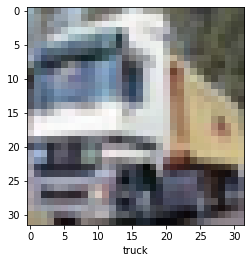

In [6]:
IMG_INDEX=1
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(classes[train_lables[IMG_INDEX][0]])
plt.show()

# building the model

In [7]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(10))

2022-06-22 17:09:50.306817: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-22 17:09:50.309481: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc): /proc/driver/nvidia/version does not exist


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Compiling the model

In [9]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["acc"])

In [10]:
model.fit(train_images,train_lables,epochs=10,validation_data=(test_images,test_lables))

2022-06-22 17:10:05.298966: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
   5/1563 [..............................] - ETA: 1:04 - loss: 2.2927 - acc: 0.1063

2022-06-22 17:10:07.068811: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19663488 exceeds 10% of free system memory.
2022-06-22 17:10:07.070713: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19663488 exceeds 10% of free system memory.
2022-06-22 17:10:07.086720: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 14191200 exceeds 10% of free system memory.
2022-06-22 17:10:07.119066: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 19663488 exceeds 10% of free system memory.


1563/1563 [==============================] - 91s 58ms/step - loss: 1.5355 - acc: 0.4407 - val_loss: 1.2460 - val_acc: 0.5571
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1419 - acc: 0.5954 - val_loss: 1.0601 - val_acc: 0.6293
Epoch 3/10
1563/1563 [==============================] - 122s 78ms/step - loss: 0.9787 - acc: 0.6568 - val_loss: 0.9574 - val_acc: 0.6647
Epoch 4/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.8833 - acc: 0.6912 - val_loss: 0.9148 - val_acc: 0.6769
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.8085 - acc: 0.7168 - val_loss: 0.8619 - val_acc: 0.7031
Epoch 6/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.7487 - acc: 0.7381 - val_loss: 0.8531 - val_acc: 0.7032
Epoch 7/10
1563/1563 [==============================] - 93s 60ms/step - loss: 0.6998 - acc: 0.7558 - val_loss: 0.8539 - val_acc: 0.7055
Epoch 8/10
1563/1563 [==============================] - 9

In [11]:
test_loss,test_acc=model.evaluate(test_images,test_lables,verbose=2)
print('test accuacy ',test_acc)

313/313 - 4s - loss: 0.8297 - acc: 0.7210 - 4s/epoch - 14ms/step
test accuacy  0.7210000157356262
